<a href="https://colab.research.google.com/github/akashsinghsharma/python-notes/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series as Features

Cycles are patterns of growth and decay in a time series associated with how the value in a series at one time depends on values at previous times, but not necessarily on the time step itself.

What distinguishes cyclic behavior from seasonality is that cycles are not necessarily time dependent, as seasons are. What happens in a cycle is less about the particular date of occurence, and more about what has happened in the recent past. The (at least relative) independence from time means that cyclic behavior can be much more irregular than seasonality.

**Lagged Series**

Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps.

# Time Series : Great Learning

**Time Series Analysis using Python**

---

There are problems where we have time going on as independent variable, and things like sales, stock price, etc. as dependent variable. Here we have data points collected over a sequence of time and we analyze that sequence and make pediction accordingly.

In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.

It can be yearly, quaterly, monthly, hourly, daily, etc. But it should always be largely consistent interval.

For eg: India GDP Data for per year. If it is consistent for each year with equal interval, it's a time series data. Same will be case of quaterly, etc.

Such data usually have a trend, of increase decrease, cycle, etc.

Feature of time series data:

1. Data can not be independent.
2. Order matters in time series. Before model implementataion this should be ensured.
3. No missing values. If we want to know about 2025, we can't know it before knowing about 2024 and 2023 directly by jumping from 2022.

Time Series have:
1. Systematic component


*   Trend-It's Long term trend like increasing or decreasing in a overall time. Like GDP of India is in increasing trend, or attention span of huaman decreasing in trend, etc.
*   Seasonality- It something that repends in roughly regular interval, like say every year. For eg. sale of sweater increases in the winter season of India, and then increases. That's a seasonal trend called seasonality. Sale may also have a sudden increase in end of winter due to high discount every year, that's seasonality too.


2. Irregular component- Like say some earthquake, pandemic, fire, etc. It irregularly decreases and hampers buisness.

**Decomposition of Time series**: Breaking it into trend, seasonality and irregular components. It is important to compare long term trend with short term movement.

In decompsition there is **additive and multiplicative model**. To choose which one is depenent on seasonality.

When seasonality is constant- additive model. Observation = Trend + Seasonality + error

When seasonality component changes - Multiplicative mode. Observation = Trend * Seasonality * error

**Additive model:**

*Observation = Trend(Buisness growth) + Seasonality(weather) + error*

Note: Buisness growth can be positive negative constant or nothing(irregular sales, etc.) as well.

Here is a viz representation of decomposition. (Credits: [Machine Learning Mastery](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/))

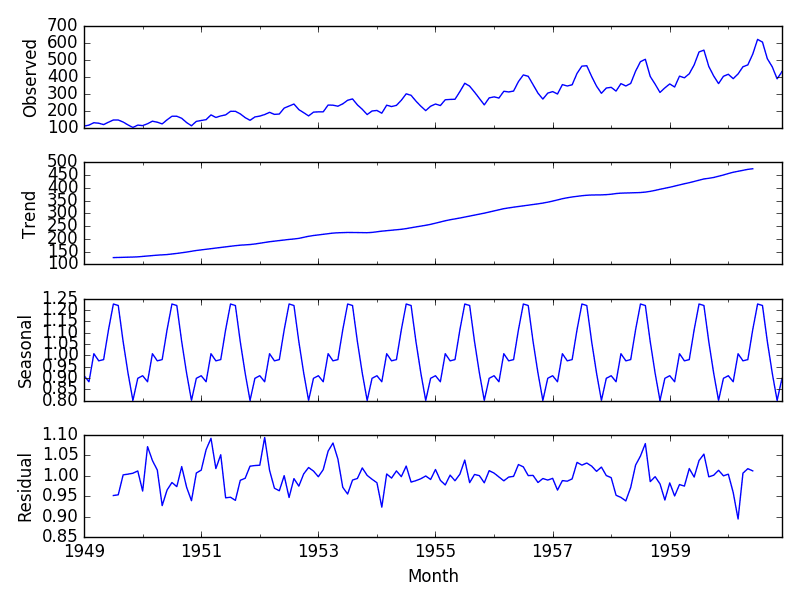


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose #This library will help us in decomposition. tsa- Time series analysis.

df1 = pd.read_csv('/content/drive/MyDrive/Random data/AirPassengers.csv')

In [ ]:
df1.dtypes

Month          object
#Passengers     int64
dtype: object

The month column is as object, which isn't good. It should be as date time.

In [ ]:
df1['Month'] = pd.to_datetime(df1['Month'])

df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [ ]:
df1.set_index('Month', inplace = True) #Setting month column as index.
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
import matplotlib.pyplot as plt

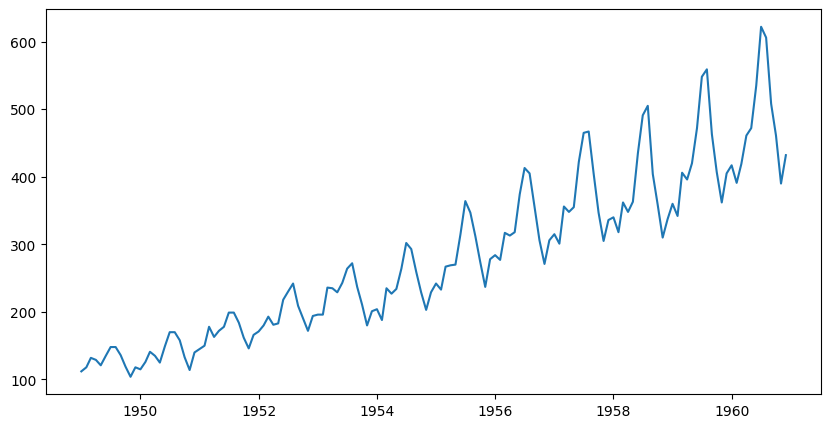

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df1)

Note that this is a graph with upward trend and some seasonality, but the seasonality is not really constant. When it chances then we use multiplicative decomposition.

In [ ]:
df1_decompose = seasonal_decompose(df1, model = 'multiplicative')

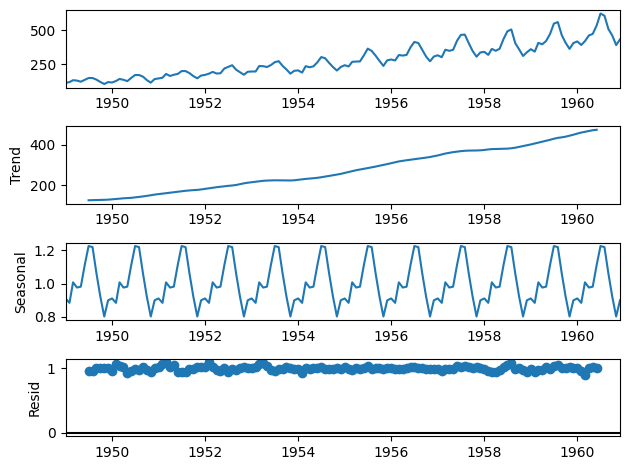

In [ ]:
df1_decompose.plot()
plt.show() #This is the decomposition plot.